In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functions
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
def load_truth_tsv(path, add_chr=False):
    df = pd.read_csv(path, sep="\t",names=["CHROM","POS","REF","ALT"],
        dtype={"CHROM":str, "POS":int, "REF":str, "ALT":str})
    if add_chr:
        df["CHROM"] = df["CHROM"].apply(lambda x: x if x.startswith("chr") else "chr" + x)
    df["key"] = df["CHROM"] + ":" + df["POS"].astype(str) + ":" + df["REF"] + ">" + df["ALT"]
    return df

In [3]:
colo829_truth = load_truth_tsv("colo829_GT.tsv", add_chr=True)
colo829_sample = pd.read_csv("colo829.tsv", sep="\t")

HCC1395_truth = load_truth_tsv("HCC1395_GT.tsv", add_chr=False)
HCC1395_sample = pd.read_csv("HCC1395.tsv", sep="\t")

C:\Users\shwet\AppData\Local\Temp\ipykernel_23972\3580927679.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  colo829_sample = pd.read_csv("colo829.tsv", sep="\t")


In [4]:
colo829_truth.value_counts

<bound method DataFrame.value_counts of       CHROM       POS REF ALT                key
0      chr1    696644   G   A    chr1:696644:G>A
1      chr1    822939   C   T    chr1:822939:C>T
2      chr1    883516   G   A    chr1:883516:G>A
3      chr1   1117642   C   T   chr1:1117642:C>T
4      chr1   1224077   C   T   chr1:1224077:C>T
...     ...       ...  ..  ..                ...
35538  chrY  13261384   T   A  chrY:13261384:T>A
35539  chrY  13263555   G   T  chrY:13263555:G>T
35540  chrY  13275788   G   A  chrY:13275788:G>A
35541  chrY  13301630   G   A  chrY:13301630:G>A
35542  chrY  13318407   C   G  chrY:13318407:C>G

[35543 rows x 5 columns]>

In [5]:
print(colo829_truth.head())
print(colo829_truth.info())

  CHROM      POS REF ALT               key
0  chr1   696644   G   A   chr1:696644:G>A
1  chr1   822939   C   T   chr1:822939:C>T
2  chr1   883516   G   A   chr1:883516:G>A
3  chr1  1117642   C   T  chr1:1117642:C>T
4  chr1  1224077   C   T  chr1:1224077:C>T
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35543 entries, 0 to 35542
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CHROM   35543 non-null  object
 1   POS     35543 non-null  int64 
 2   REF     35543 non-null  object
 3   ALT     35543 non-null  object
 4   key     35543 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.4+ MB
None


In [6]:
print(colo829_truth.shape)
print(HCC1395_truth.shape)


(35543, 5)
(39447, 5)


In [7]:
print(colo829_sample.head())
print(colo829_sample.info())

                key CHROM        POS REF ALT    QUAL   FILTER  FAU  FCU  FGU  \
0  10:100049086:G>A    10  100049086   G   A  12.601  LowQual    4    0   25   
1   10:10040909:G>C    10   10040909   G   C  26.935     PASS    0   17   16   
2  10:100449050:C>T    10  100449050   C   T  26.482     PASS    0    0    0   
3  10:100636076:G>A    10  100636076   G   A  28.874     PASS   32    0    0   
4  10:100765904:T>C    10  100765904   T   C  24.776     PASS    0   20    0   

   ...  CU  GU  TU  NDP  NAF  NAU  NCU  NGU  NTU  \
0  ...   0  56   0  101  0.0    0    0  101    0   
1  ...  36  29   1  106  0.0    0    0  105    1   
2  ...   0   0  51   96  0.0    0   96    0    0   
3  ...   0   0   0   93  0.0    0    0   93    0   
4  ...  36   0  24  121  0.0    0    0    0  121   

                                         SEQ_CONTEXT  
0  AAAAAATGATAAAAAATAATACAATAAGAAATAATATATATAAAAA...  
1  TGGTCAATTGTGTACCTGTATTTTTATCTGAAAGTAAAATTTTTTT...  
2  ATTAGCAATGAGGTCACTGACACTTTGTTCATTTTTTT

In [8]:
print(colo829_sample.shape)

(46881, 32)


In [9]:
print(HCC1395_sample.shape)

(41184, 32)


In [10]:
print(colo829_sample["AD"].head())

0     0,7
1    0,36
2    0,51
3    0,62
4    0,36
Name: AD, dtype: object


In [11]:
print(colo829_sample["NAD"].tail())

46876    41,2
46877    41,2
46878    42,1
46879    42,1
46880    83,4
Name: NAD, dtype: object


In [12]:
print(HCC1395_truth.head())
print(HCC1395_truth.info())

  CHROM      POS REF ALT               key
0  chr1   877772   G   C   chr1:877772:G>C
1  chr1  1004726   G   A  chr1:1004726:G>A
2  chr1  1049980   G   C  chr1:1049980:G>C
3  chr1  1212740   A   C  chr1:1212740:A>C
4  chr1  1263518   G   A  chr1:1263518:G>A
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39447 entries, 0 to 39446
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CHROM   39447 non-null  object
 1   POS     39447 non-null  int64 
 2   REF     39447 non-null  object
 3   ALT     39447 non-null  object
 4   key     39447 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB
None


In [13]:
print(HCC1395_sample.head())
print(HCC1395_sample.info())

                   key  CHROM        POS REF ALT    QUAL   FILTER  FAU  FCU  \
0  chr10:100008967:C>T  chr10  100008967   C   T   0.000  LowQual    0   60   
1  chr10:100008968:T>G  chr10  100008968   T   G   0.000  LowQual    0    0   
2  chr10:100136587:G>C  chr10  100136587   G   C  26.867     PASS    0   18   
3  chr10:100140022:G>C  chr10  100140022   G   C  23.395     PASS    0   10   
4  chr10:100164228:G>C  chr10  100164228   G   C  25.167     PASS    0   47   

   FGU  ...   CU  GU   TU  NDP  NAF  NAU  NCU NGU  NTU  \
0    0  ...  104   0    3   47  0.0    0   47   0    0   
1    0  ...    0   3  104   47  0.0    0    0   0   47   
2   13  ...   45  24    0   50  0.0    0    0  50    0   
3   14  ...   23  33    0   55  0.0    0    0  55    0   
4    0  ...   78   1    0   38  0.0    0    0  38    0   

                                         SEQ_CONTEXT  
0  AGACTATGCTCAAACCCTAAATATTAGCGTTACCACTCGCCTGCCA...  
1  GACTATGCTCAAACCCTAAATATTAGCGTTACCACTCGCCTGCCAC...  
2  TCCTGAAA

In [14]:
colo829_sample["CHROM"] = colo829_sample["CHROM"].astype(str)
colo829_sample["CHROM"] = colo829_sample["CHROM"].apply(lambda x: x if x.startswith("chr") else "chr" + x)
colo829_sample = colo829_sample.drop("key", axis= 1)
colo829_sample["key"] = colo829_sample["CHROM"] + ":" + colo829_sample["POS"].astype(str) + ":" + colo829_sample["REF"] + ">" + colo829_sample["ALT"]
print(colo829_sample["key"])

HCC1395_sample["CHROM"] =HCC1395_sample["CHROM"].astype(str)
HCC1395_sample["CHROM"] = HCC1395_sample["CHROM"].apply(lambda x: x if x.startswith("chr") else "chr" + x)
HCC1395_sample = HCC1395_sample.drop("key", axis= 1)
HCC1395_sample["key"] = HCC1395_sample["CHROM"] + ":" + HCC1395_sample["POS"].astype(str) + ":" + HCC1395_sample["REF"] + ">" + HCC1395_sample["ALT"]
print(HCC1395_sample["key"])

HCC1395_sample["label"] = HCC1395_sample["key"].isin(HCC1395_truth["key"]).astype(int)
colo829_sample["label"] = colo829_sample["key"].isin(colo829_truth["key"]).astype(int)


0        chr10:100049086:G>A
1         chr10:10040909:G>C
2        chr10:100449050:C>T
3        chr10:100636076:G>A
4        chr10:100765904:T>C
                ...         
46876       chrY:9925507:G>C
46877       chrY:9925511:T>G
46878       chrY:9925535:A>C
46879       chrY:9925536:G>A
46880       chrY:9997393:C>T
Name: key, Length: 46881, dtype: object
0        chr10:100008967:C>T
1        chr10:100008968:T>G
2        chr10:100136587:G>C
3        chr10:100140022:G>C
4        chr10:100164228:G>C
                ...         
41179      chr9:99815392:T>C
41180      chr9:99826856:C>A
41181      chr9:99837041:T>G
41182      chr9:99890742:G>T
41183      chr9:99974276:C>T
Name: key, Length: 41184, dtype: object


In [15]:
print(HCC1395_sample["label"].value_counts())

print(colo829_sample["label"].value_counts())

label
1    32183
0     9001
Name: count, dtype: int64
label
1    35180
0    11701
Name: count, dtype: int64


In [16]:
final_df = pd.concat([colo829_sample, HCC1395_sample] , ignore_index=True)
print(colo829_sample.shape)
print(HCC1395_sample.shape)
print(final_df.shape)

(46881, 33)
(41184, 33)
(88065, 33)


In [17]:
final_df = final_df.drop_duplicates(subset=["CHROM","POS","REF","ALT","label"], keep="first",ignore_index=True)

print(final_df.shape)

(88065, 33)


In [18]:
final_df["label"].value_counts()

label
1    67363
0    20702
Name: count, dtype: int64

In [19]:
final_df[["ref_ad", "alt_ad"]] = (final_df["AD"]
        .astype(str)
        .str.split(",", expand=True)
        .fillna(0)
        .astype(int))

In [20]:
final_df = final_df[final_df["alt_ad"]>= 2] #filtering based on alt allele counts in tumor

In [21]:
final_df.shape

(88031, 35)

In [22]:
final_df = final_df.drop_duplicates(subset=["CHROM","POS","REF","ALT","label"], keep="first",ignore_index=True)


In [23]:
final_df["label"].value_counts()

label
1    67363
0    20668
Name: count, dtype: int64

In [24]:
final_truth_df = final_df[final_df["label"]==1]

In [25]:
truth_tab = pd.crosstab(final_truth_df["REF"], final_truth_df["ALT"])
print(truth_tab)

ALT      A     C     G      T
REF                          
A        0  1641  2728   2301
C     4116     0  4289  18242
G    18622  4332     0   4248
T     2241  2841  1762      0


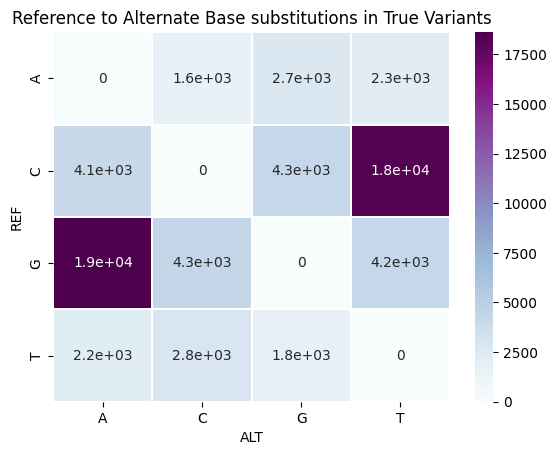

In [26]:
sns.heatmap(data=truth_tab, annot=True, linewidths=0.01, cmap="BuPu")
plt.title("Reference to Alternate Base substitutions in True Variants", size=12)
plt.savefig("Variant_R_A");

In [27]:
final_false_df = final_df[final_df["label"]==0]

In [28]:
false_tab = pd.crosstab(final_false_df["REF"], final_false_df["ALT"])
print(false_tab)

ALT     A     C     G     T
REF                        
A       0   901  1920   958
C    1445     0  1076  4048
G    3894   961     0  1380
T    1023  2113   949     0


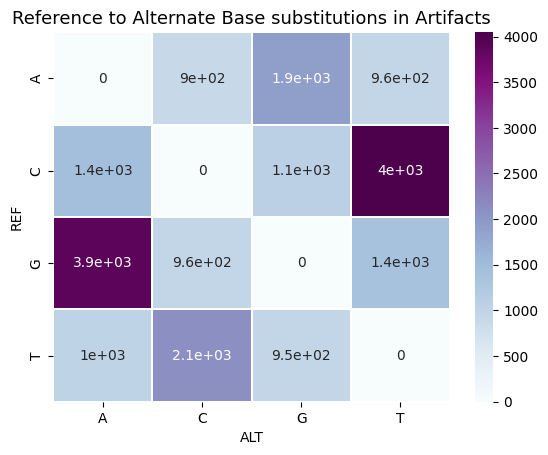

In [29]:
sns.heatmap(data=false_tab, annot=True, linewidths=0.01, cmap="BuPu")
plt.title("Reference to Alternate Base substitutions in Artifacts", size=13)
plt.savefig("Artifact_R_A");

In [30]:
final_df["ALT_SEQ_CONTEXT"] = final_df.apply(lambda x: x["SEQ_CONTEXT"][:50] + x["ALT"] + x["SEQ_CONTEXT"][51:], axis=1)
percs = []

for x in final_df["ALT_SEQ_CONTEXT"]:
    x = x.upper()
    if "G" in x and "C" in x:
        y =round(((x.count("G") + x.count("C"))/len(x)), 2)
    else:
        y = 0
    percs.append(y)
final_df["GC"] = percs


In [31]:
final_df.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'FILTER', 'FAU', 'FCU', 'FGU',
       'FTU', 'RAU', 'RCU', 'RGU', 'RTU', 'DP', 'AF', 'GT', 'GQ', 'AD', 'NAD',
       'AU', 'CU', 'GU', 'TU', 'NDP', 'NAF', 'NAU', 'NCU', 'NGU', 'NTU',
       'SEQ_CONTEXT', 'key', 'label', 'ref_ad', 'alt_ad', 'ALT_SEQ_CONTEXT',
       'GC'],
      dtype='object')

In [32]:
f_total = final_df[["FAU", "FCU", "FGU", "FTU"]].sum(axis=1)
r_total = final_df[["RAU", "RCU", "RGU", "RTU"]].sum(axis=1)

final_df["STRAND_BIAS"] = np.abs(f_total - r_total) / (f_total + r_total + 1e-6)

In [33]:
final_df["QUAL"]

0        12.601
1        26.935
2        26.482
3        28.874
4        24.776
          ...  
88026    25.032
88027    18.902
88028    19.848
88029    21.230
88030    22.989
Name: QUAL, Length: 88031, dtype: float64

In [34]:
def count_homo(seq):
    seq = seq.upper()          
    max_num = 1                
    start = 1                    
    for i in range(1, len(seq)):         
        if seq[i] == seq[i-1]:           
            start += 1
            max_num = max(max_num, start)
        else:                             
            start = 1
    return max_num 

In [35]:
homopols = []
for i in final_df["ALT_SEQ_CONTEXT"]:
    homopols.append(count_homo(i))

In [36]:
final_df["HOMO"] = homopols


In [37]:
final_df["DELTA_AF"] = final_df["AF"] - final_df["NAF"]

In [38]:
final_df.dtypes

CHROM               object
POS                  int64
REF                 object
ALT                 object
QUAL               float64
FILTER              object
FAU                  int64
FCU                  int64
FGU                  int64
FTU                  int64
RAU                  int64
RCU                  int64
RGU                  int64
RTU                  int64
DP                   int64
AF                 float64
GT                  object
GQ                   int64
AD                  object
NAD                 object
AU                   int64
CU                   int64
GU                   int64
TU                   int64
NDP                  int64
NAF                float64
NAU                  int64
NCU                  int64
NGU                  int64
NTU                  int64
SEQ_CONTEXT         object
key                 object
label                int64
ref_ad               int64
alt_ad               int64
ALT_SEQ_CONTEXT     object
GC                 float64
S

In [39]:
final_df["NDP"].describe() 

count    88031.000000
mean        69.434143
std         62.736323
min          1.000000
25%         41.000000
50%         59.000000
75%         93.000000
max       8198.000000
Name: NDP, dtype: float64

In [40]:
final_df["QUAL"].describe()

count    88031.000000
mean        18.856599
std          9.058435
min          0.000000
25%         15.158000
50%         22.322000
75%         25.497000
max         32.702000
Name: QUAL, dtype: float64

In [41]:
final_df["DELTA_AF"].describe() 

count    88031.000000
mean         0.474093
std          0.302716
min          0.000100
25%          0.240300
50%          0.445800
75%          0.645600
max          1.000000
Name: DELTA_AF, dtype: float64

In [42]:
final_df["STRAND_BIAS"].describe() #needs to be scaled

count    88031.000000
mean         0.088215
std          0.089895
min          0.000000
25%          0.031579
50%          0.067669
75%          0.120000
max          1.000000
Name: STRAND_BIAS, dtype: float64

In [43]:
final_df["HOMO"].describe() #needs to be scaled

count    88031.000000
mean         5.056378
std          2.395192
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max         45.000000
Name: HOMO, dtype: float64

In [44]:
final_df["DP"].describe()

count    88031.000000
mean        97.496904
std         44.045796
min          3.000000
25%         70.000000
50%         92.000000
75%        117.000000
max       1350.000000
Name: DP, dtype: float64

In [45]:
final_df["GC"].describe()

count    88031.000000
mean         0.412069
std          0.106702
min          0.000000
25%          0.340000
50%          0.400000
75%          0.490000
max          0.910000
Name: GC, dtype: float64

In [46]:
final_test_df = final_df.drop(["SEQ_CONTEXT","AF","NAF","ref_ad","alt_ad","FAU","NAD","FGU","FCU","FTU","RAU","RGU","RCU","GT","RTU","AD","AU","CU","GU","TU","NGU","NAU","NCU","key","CHROM","NTU","POS","FILTER","ALT_SEQ_CONTEXT"], axis =1)

In [45]:
#"AF", "NAF"

In [47]:
final_test_df.columns

Index(['REF', 'ALT', 'QUAL', 'DP', 'GQ', 'NDP', 'label', 'GC', 'STRAND_BIAS',
       'HOMO', 'DELTA_AF'],
      dtype='object')

In [48]:
finale_corr = final_test_df.select_dtypes("number").corr()

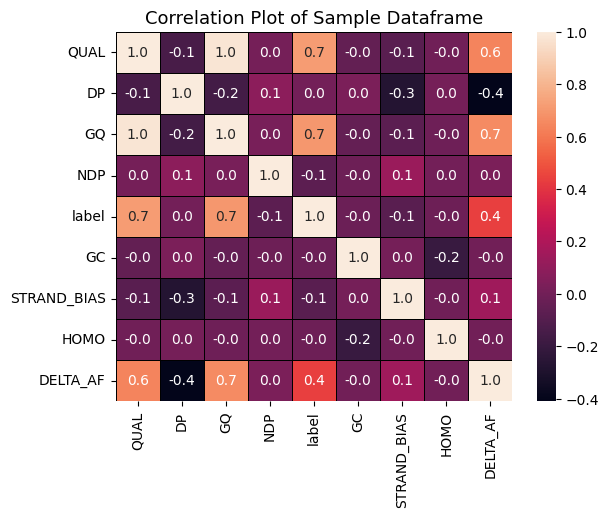

In [49]:
sns.heatmap(finale_corr, annot=True, fmt='.1f',linewidths=0.7, linecolor='black')
plt.title("Correlation Plot of Sample Dataframe", size=13)
plt.savefig("corr_plot");

In [50]:
histogram_cols = ["HOMO", "STRAND_BIAS", "DP", "NDP", "GC","AF","NAF","QUAL","DELTA_AF" ]

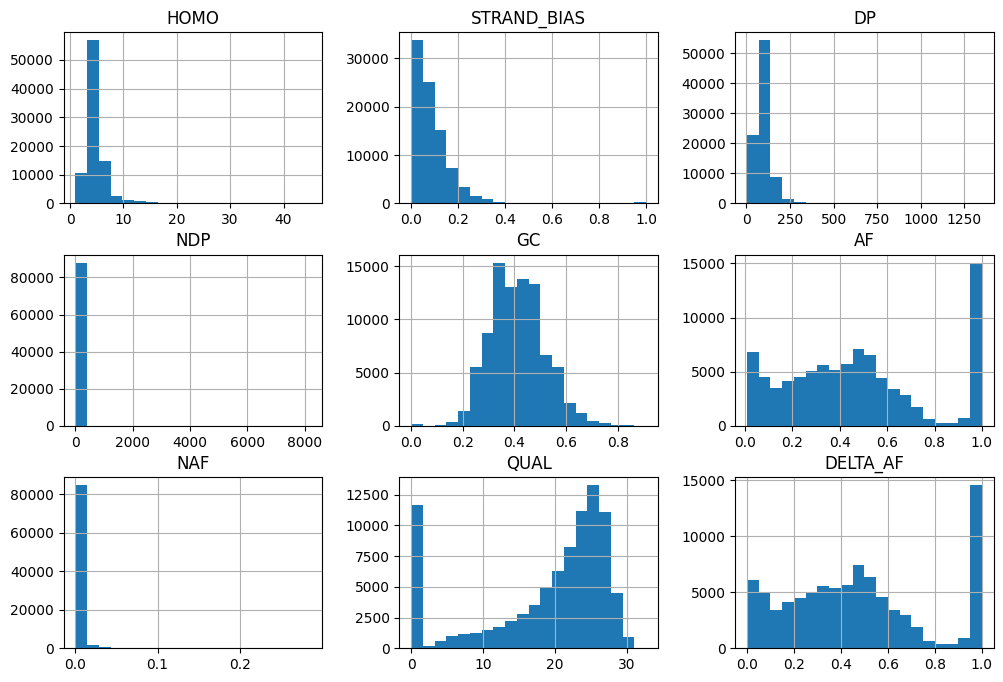

In [51]:
final_df[histogram_cols].hist(bins=20, figsize=(12,8));

In [52]:
final_df.shape

(88031, 40)

In [53]:
final_df["GC"].count()

np.int64(88031)

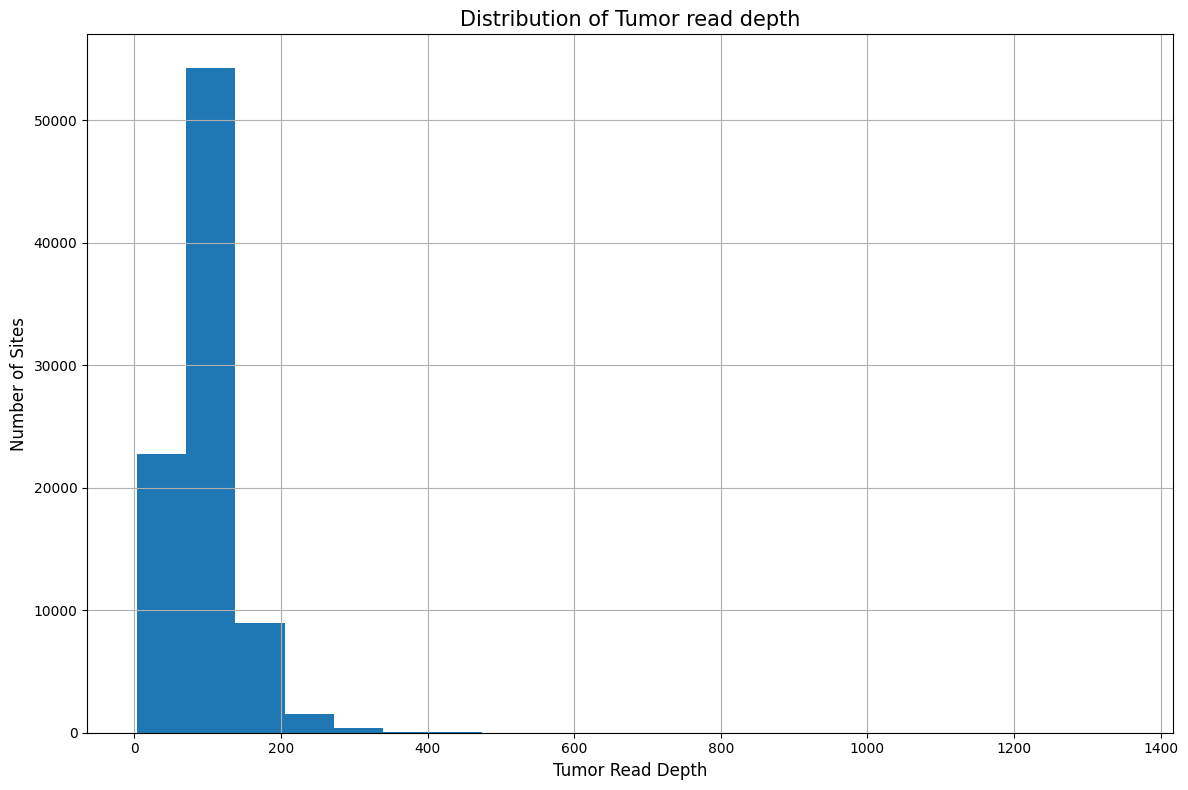

In [54]:
plt.figure(figsize=(12, 8))
final_df["DP"].hist(bins=20)
plt.title("Distribution of Tumor read depth", size=15)
plt.xlabel("Tumor Read Depth", size=12)
plt.ylabel("Number of Sites", size=12)
plt.tight_layout()      
plt.savefig("DP_histogram.png", dpi=300)
plt.show()

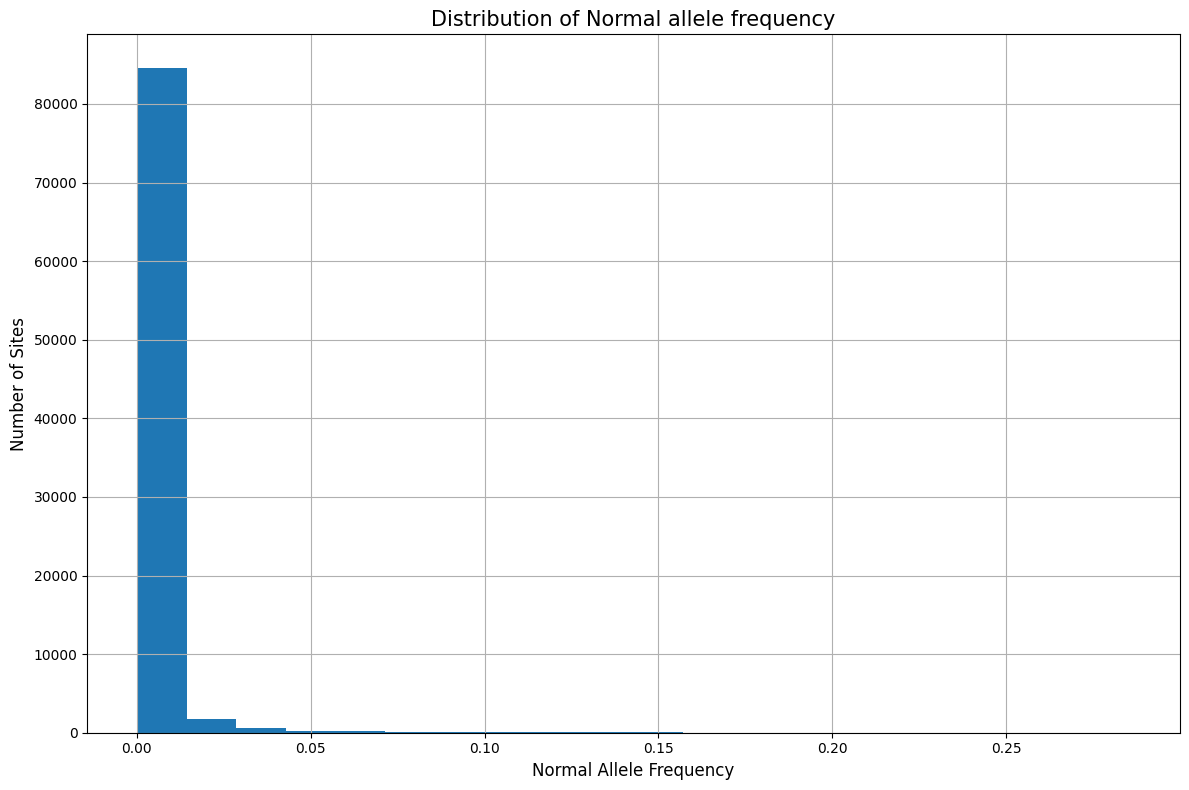

In [55]:
plt.figure(figsize=(12, 8))
final_df["NAF"].hist(bins=20)
plt.title("Distribution of Normal allele frequency", size=15)
plt.xlabel("Normal Allele Frequency", size=12)
plt.ylabel("Number of Sites", size=12)
plt.tight_layout()      
plt.savefig("NAF_histogram.png", dpi=300)
plt.show()

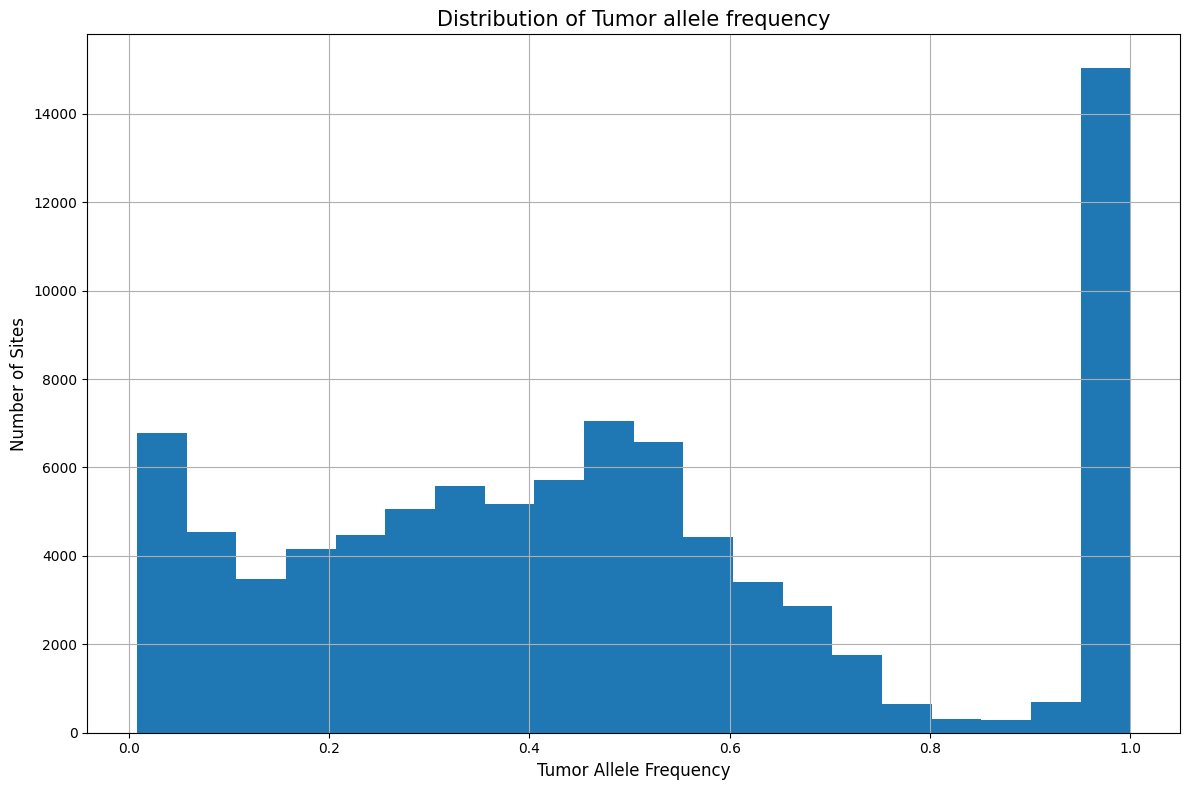

In [56]:
plt.figure(figsize=(12, 8))
final_df["AF"].hist(bins=20)
plt.title("Distribution of Tumor allele frequency", size=15)
plt.xlabel("Tumor Allele Frequency", size=12)
plt.ylabel("Number of Sites", size=12)
plt.tight_layout()      
plt.savefig("AF_histogram.png", dpi=300)
plt.show()

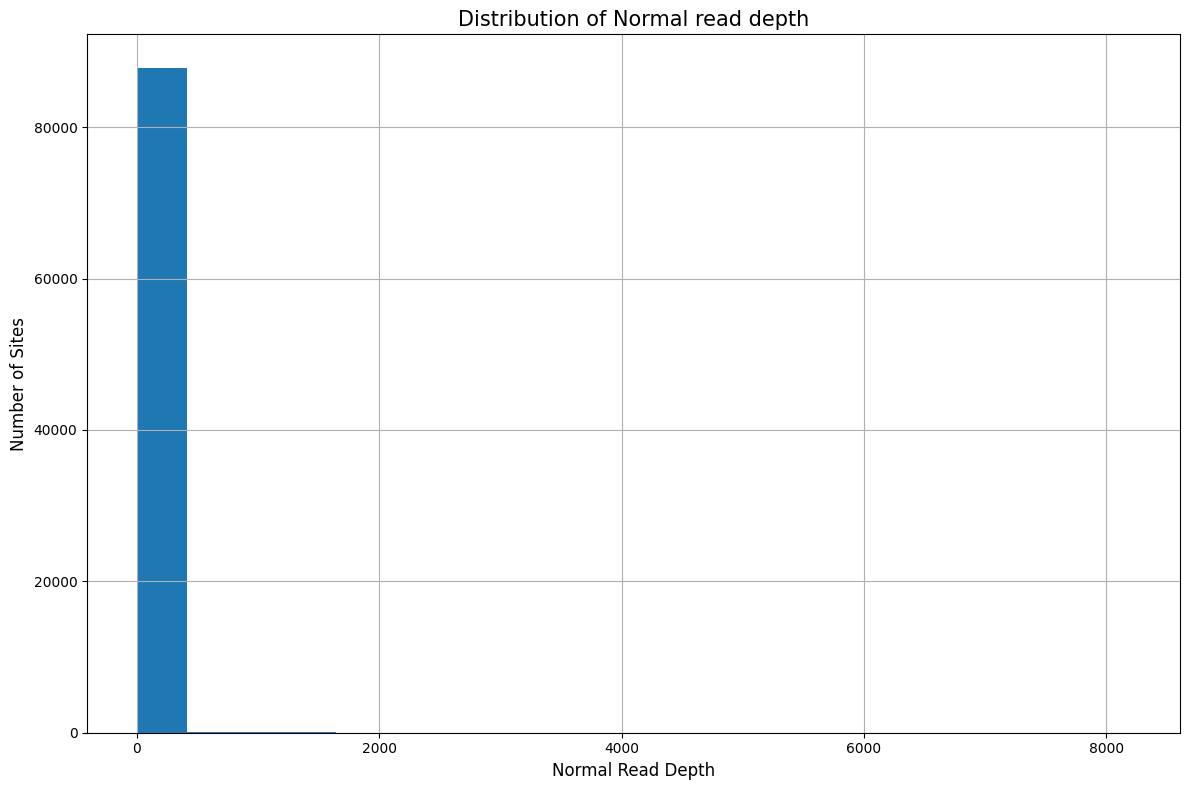

In [57]:
plt.figure(figsize=(12, 8))
final_df["NDP"].hist(bins=20)
plt.title("Distribution of Normal read depth", size=15)
plt.xlabel("Normal Read Depth", size=12)
plt.ylabel("Number of Sites", size=12)
plt.tight_layout()       
plt.savefig("NDP_histogram.png", dpi=300)
plt.show()

In [58]:
log_cols = ["NDP", "DP"] #log-transform
for x in log_cols:
    final_df[f"log_{x}"] = np.log1p(final_df[x])

In [59]:
final_df.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'FILTER', 'FAU', 'FCU', 'FGU',
       'FTU', 'RAU', 'RCU', 'RGU', 'RTU', 'DP', 'AF', 'GT', 'GQ', 'AD', 'NAD',
       'AU', 'CU', 'GU', 'TU', 'NDP', 'NAF', 'NAU', 'NCU', 'NGU', 'NTU',
       'SEQ_CONTEXT', 'key', 'label', 'ref_ad', 'alt_ad', 'ALT_SEQ_CONTEXT',
       'GC', 'STRAND_BIAS', 'HOMO', 'DELTA_AF', 'log_NDP', 'log_DP'],
      dtype='object')

In [60]:
normal_cols = ["log_DP", "log_NDP", "NAF", "HOMO", "STRAND_BIAS","QUAL","DELTA_AF"] #normalization
scaler = MinMaxScaler()
final_df[[f"{x}_normal" for x in normal_cols]] = scaler.fit_transform(final_df[normal_cols])

In [ ]:
#"DELTA_AF"

In [61]:
final_df = final_df.drop(columns=["log_NDP","log_DP"])
final_df.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'FILTER', 'FAU', 'FCU', 'FGU',
       'FTU', 'RAU', 'RCU', 'RGU', 'RTU', 'DP', 'AF', 'GT', 'GQ', 'AD', 'NAD',
       'AU', 'CU', 'GU', 'TU', 'NDP', 'NAF', 'NAU', 'NCU', 'NGU', 'NTU',
       'SEQ_CONTEXT', 'key', 'label', 'ref_ad', 'alt_ad', 'ALT_SEQ_CONTEXT',
       'GC', 'STRAND_BIAS', 'HOMO', 'DELTA_AF', 'log_DP_normal',
       'log_NDP_normal', 'NAF_normal', 'HOMO_normal', 'STRAND_BIAS_normal',
       'QUAL_normal', 'DELTA_AF_normal'],
      dtype='object')

In [62]:
final_df = final_df.rename(columns={'log_DP_normal' : 'DP_normal', 'log_NDP_normal' : 'NDP_normal'})

In [63]:
enc = OneHotEncoder(sparse_output=False, dtype=int, handle_unknown="ignore")

In [64]:
encoded = enc.fit_transform(final_df[["REF", "ALT"]])

In [65]:
cols = enc.get_feature_names_out(["REF", "ALT"])

In [66]:
enc_df = pd.DataFrame(encoded, columns=cols, index=final_df.index)

In [146]:
final_df = pd.concat([final_df, enc_df], axis=1)

In [67]:
final_df.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'FILTER', 'FAU', 'FCU', 'FGU',
       'FTU', 'RAU', 'RCU', 'RGU', 'RTU', 'DP', 'AF', 'GT', 'GQ', 'AD', 'NAD',
       'AU', 'CU', 'GU', 'TU', 'NDP', 'NAF', 'NAU', 'NCU', 'NGU', 'NTU',
       'SEQ_CONTEXT', 'key', 'label', 'ref_ad', 'alt_ad', 'ALT_SEQ_CONTEXT',
       'GC', 'STRAND_BIAS', 'HOMO', 'DELTA_AF', 'DP_normal', 'NDP_normal',
       'NAF_normal', 'HOMO_normal', 'STRAND_BIAS_normal', 'QUAL_normal',
       'DELTA_AF_normal'],
      dtype='object')

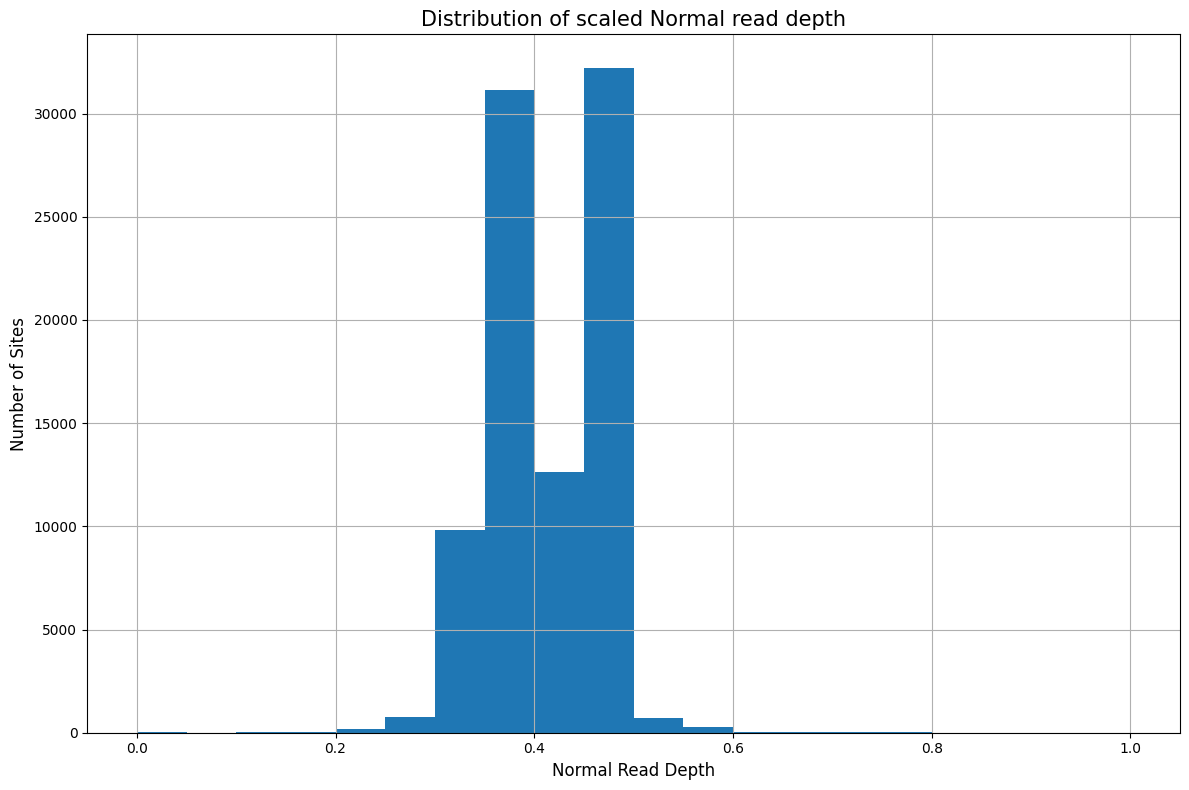

In [68]:
plt.figure(figsize=(12, 8))
final_df["NDP_normal"].hist(bins=20)
plt.title("Distribution of scaled Normal read depth", size=15)
plt.xlabel("Normal Read Depth", size=12)
plt.ylabel("Number of Sites", size=12)
plt.tight_layout()       
plt.savefig("NDP_scale_histogram.png", dpi=300)
plt.show()

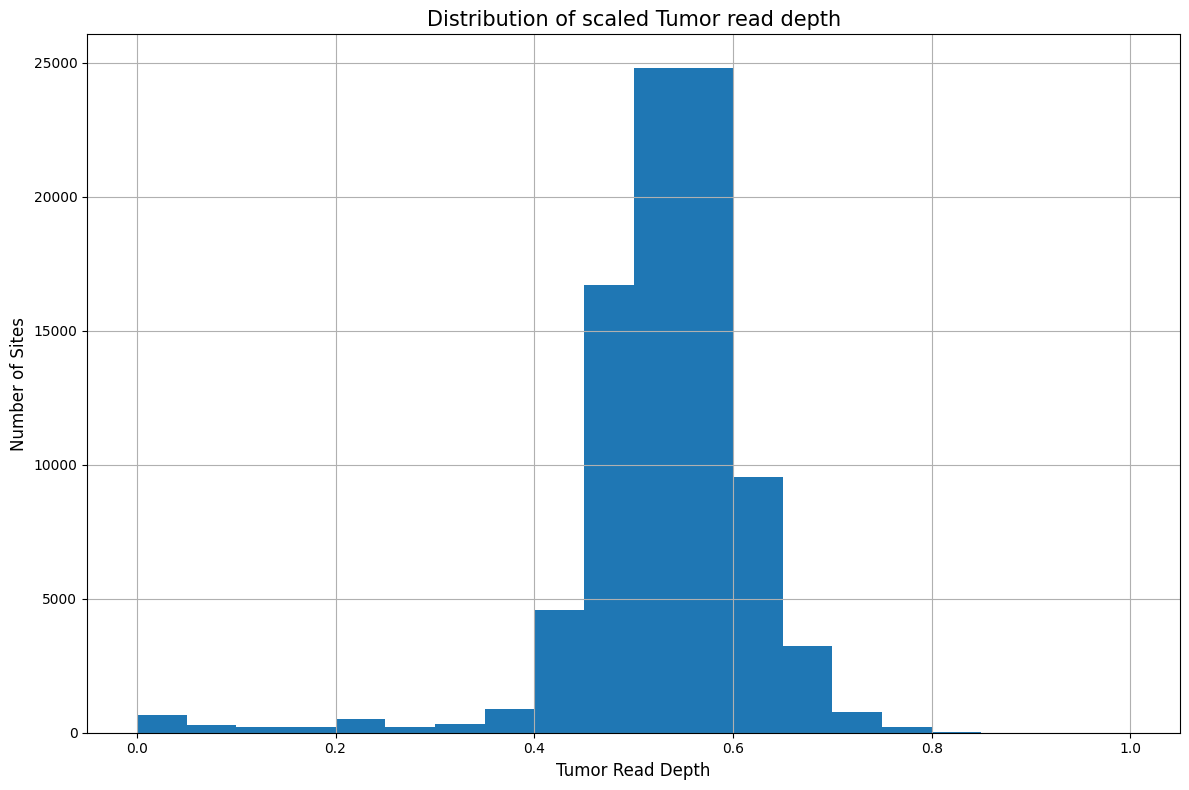

In [69]:
plt.figure(figsize=(12, 8))
final_df["DP_normal"].hist(bins=20)
plt.title("Distribution of scaled Tumor read depth", size=15)
plt.xlabel("Tumor Read Depth", size=12)
plt.ylabel("Number of Sites", size=12)
plt.tight_layout()       
plt.savefig("DP_scaled_histogram.png", dpi=300)
plt.show()

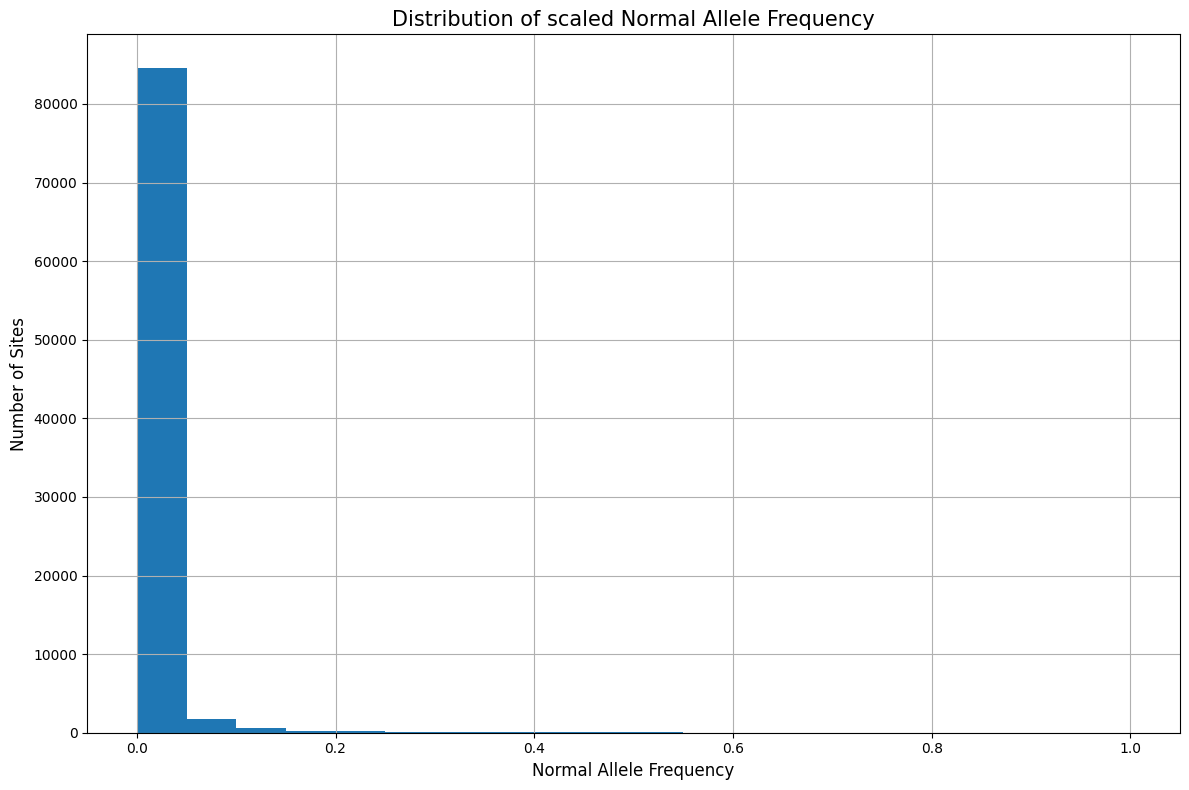

In [70]:
plt.figure(figsize=(12, 8))
final_df["NAF_normal"].hist(bins=20)
plt.title("Distribution of scaled Normal Allele Frequency", size=15)
plt.xlabel("Normal Allele Frequency", size=12)
plt.ylabel("Number of Sites", size=12)
plt.tight_layout()       
plt.savefig("NAF_scaled_histogram.png", dpi=300)
plt.show()

In [71]:
down_df = functions.chrom_downsample(final_df)

print(down_df.shape)

print(down_df["label"].value_counts())
print(down_df.columns)
print(down_df.isnull().any())
print(down_df["GC"].value_counts())

(41543, 47)
label
1    20875
0    20668
Name: count, dtype: int64
Index(['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'FILTER', 'FAU', 'FCU', 'FGU',
       'FTU', 'RAU', 'RCU', 'RGU', 'RTU', 'DP', 'AF', 'GT', 'GQ', 'AD', 'NAD',
       'AU', 'CU', 'GU', 'TU', 'NDP', 'NAF', 'NAU', 'NCU', 'NGU', 'NTU',
       'SEQ_CONTEXT', 'key', 'label', 'ref_ad', 'alt_ad', 'ALT_SEQ_CONTEXT',
       'GC', 'STRAND_BIAS', 'HOMO', 'DELTA_AF', 'DP_normal', 'NDP_normal',
       'NAF_normal', 'HOMO_normal', 'STRAND_BIAS_normal', 'QUAL_normal',
       'DELTA_AF_normal'],
      dtype='object')
CHROM                 False
POS                   False
REF                   False
ALT                   False
QUAL                  False
FILTER                False
FAU                   False
FCU                   False
FGU                   False
FTU                   False
RAU                   False
RCU                   False
RGU                   False
RTU                   False
DP                    False
AF          

In [72]:
down_df.shape

(41543, 47)

In [73]:
down_df["label"].value_counts()

label
1    20875
0    20668
Name: count, dtype: int64

In [74]:
down_df.to_pickle("down_df.pkl")

In [77]:
down_df.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'FILTER', 'FAU', 'FCU', 'FGU',
       'FTU', 'RAU', 'RCU', 'RGU', 'RTU', 'DP', 'AF', 'GT', 'GQ', 'AD', 'NAD',
       'AU', 'CU', 'GU', 'TU', 'NDP', 'NAF', 'NAU', 'NCU', 'NGU', 'NTU',
       'SEQ_CONTEXT', 'key', 'label', 'ref_ad', 'alt_ad', 'ALT_SEQ_CONTEXT',
       'GC', 'STRAND_BIAS', 'HOMO', 'DELTA_AF', 'DP_normal', 'NDP_normal',
       'NAF_normal', 'HOMO_normal', 'STRAND_BIAS_normal', 'QUAL_normal',
       'DELTA_AF_normal'],
      dtype='object')

In [75]:
true_var = down_df[down_df["label"] == 1]

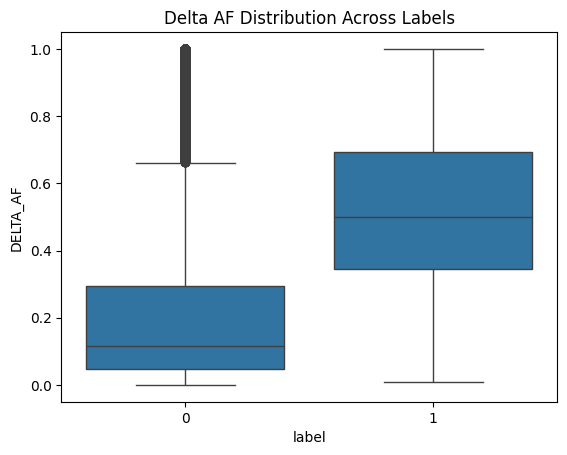

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=down_df, x="label", y="DELTA_AF")
plt.title("Delta AF Distribution Across Labels")
plt.show()

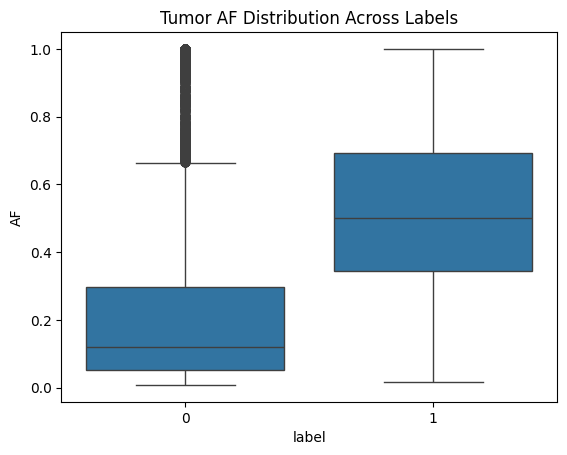

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=down_df, x="label", y="AF")
plt.title("Tumor AF Distribution Across Labels")
plt.show()

In [82]:
down_df.groupby("label")["AF"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,20668.0,0.244801,0.289422,0.0079,0.0508,0.1184,0.29630,1.0
1,20875.0,0.547402,0.270148,0.0154,0.3444,0.5000,0.69255,1.0


In [83]:
down_df.groupby("label")["NAF"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,20668.0,0.007054,0.021492,0.0,0.0,0.0,0.0,0.2857
1,20875.0,0.000324,0.002990,0.0,0.0,0.0,0.0,0.0909


In [78]:
down_df.groupby("label")["DELTA_AF"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,20668.0,0.237748,0.280136,0.0001,0.0482,0.1152,0.2936,1.0
1,20875.0,0.547078,0.270172,0.0079,0.3441,0.5000,0.6923,1.0


Text(0, 0.5, 'AF')

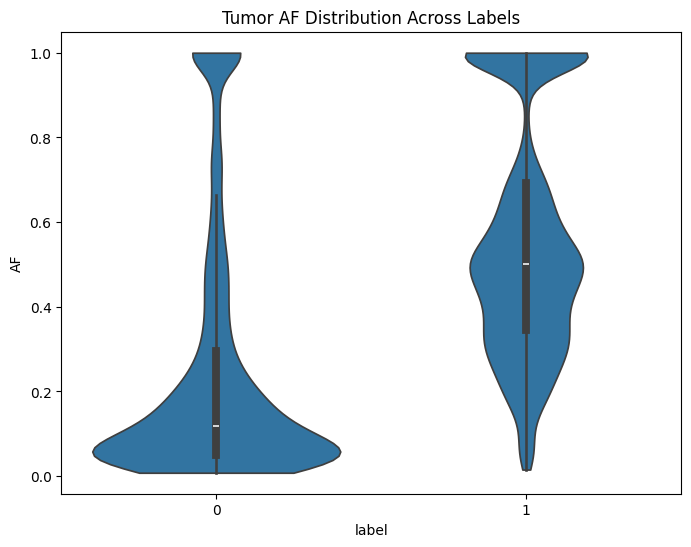

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.violinplot(data=down_df, x="label", y="AF", inner="box", cut=0)

plt.title("Tumor AF Distribution Across Labels")
plt.xlabel("label")
plt.ylabel("AF")